Euler 60o - numpy 2.849653908226361
Euler 60o - otimizado 2.8990790227087935
Euler otimizado:  0.14341499991132878 milissegundos

   X     Valor
0  0         1
1  1    2.7183
2  2    7.3891
3  3   20.0855
4  4   54.5981
5  5  148.4131

Média otimizado:  25.772375002159404
Média Final:  6.775027789747885
Erro otimizado:  8443.071757682947
Erro Final:  15336.036576168493
1.3498588075760032


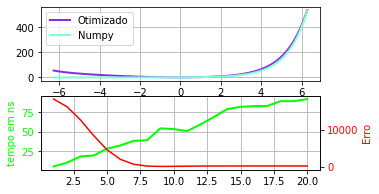

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math as m
import timeit as t
import pandas as pd

def euler_otimizado(x, n_max = 10):
  numerador = np.multiply(x,x)
  denominador = 1.0
  euler = np.add(1.0, numerador/denominador)

  for n in range(1, n_max):
    numerador = np.power(x, (1 * n + 1))
    denominador = m.factorial(1 * n + 1)
    euler = np.add(euler, numerador/denominador)
    
  return euler


x = np.linspace(-2*np.pi, 2*np.pi, 1000) 
y = euler_otimizado(x)
y2 = np.exp(x)

fig,(ax, ax1) = plt.subplots(2)
fig.set_size_inches(5, 3)
ax.plot(x, y, linewidth=2.0, label="Otimizado", color="blueviolet")
ax.plot(x, y2, linewidth=2.0, label="Numpy", color="aquamarine")
ax.legend()
ax.grid() 
fig.show()

#A função é mais aproximada em 0 até 2! O valor de N é 9

sesseta_graus = np.pi/3
start = t.default_timer()
euler_otimizadox = euler_otimizado(sesseta_graus)
t_euler_otimizado = t.default_timer() - start

print("Euler 60o - numpy", np.exp(sesseta_graus))
print("Euler 60o - otimizado", euler_otimizadox)
print('Euler otimizado: ', t_euler_otimizado*1000, "milissegundos\n")

n_max = 20
points = 360
enes = np.arange(1,n_max+1)
medias = np.zeros(n_max)
error = np.zeros(n_max)
xa = np.linspace(0, 2*np.pi, points) 


def tempo(xa,n):
  start = t.default_timer()
  valor = euler_otimizado(xa,n)
  loss_function = pow(valor - np.exp(xa),2) 
  return t.default_timer() - start, loss_function


tempo_vector = np.vectorize(tempo)

for n in enes:
  calc, erro = tempo_vector(xa,n)
  medias[n-1] = np.mean(calc)*1000*1000
  error[n-1] = np.sum(erro)/points

fig.set_size_inches(5,3)
ax1.plot(enes, medias, linewidth=2.0, color="lime")
ax1.grid()
color = "lime"
ax1.set_ylabel('tempo em ns', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1 = ax1.twinx()
color = "red"
ax1.set_ylabel('Erro', color=color) 
ax1.plot(enes, error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

valoresDeX = [['0','1'], 
              ['1', '2.7183'],          
              ['2', '7.3891'], 
              ['3', '20.0855'],
              ['4', '54.5981'], 
              ['5', '148.4131']]

df = pd.DataFrame(valoresDeX, columns=['X', 'Valor'])
print(df)


ex_table = {
    0: 1,
    1: 2.7183,
    2: 7.3891,
    3: 20.0855,
    4: 54.5981,
    5: 148.4131
}

def euler_horner(x):
  return 1 + x + (((x/2) * (1 + (x/3) * (1 + (x/4) * (1 + (x/5) * (1 + (x/6) * (1 + (x/7) * (1 + (x/8) * (1 + (x/9) * (1 + (x/10)))))))))))

def ex_final(x):
  if x in ex_table:
    return ex_table[x]
  else:
    return euler_horner(x)


points = 360
x = np.linspace(0, 2*np.pi, points)

def tempo_otimizado(x):
  start = t.default_timer()
  valor = euler_otimizado(x,4)
  loss_function = pow(valor - np.exp(x),2)
  return t.default_timer() - start, loss_function

def tempo_final(x):
  start = t.default_timer()
  valor = ex_final(x)
  loss_function = pow(valor - np.exp(x),2)
  return t.default_timer() - start, loss_function

soma_otimizada = 0
erro_otimizado = 0

for item in x:
  tempo, erro = tempo_otimizado(item)
  erro_otimizado += erro
  soma_otimizada += tempo
  
media_otimizado = soma_otimizada*1000*1000/points
erro_otimizado = erro_otimizado/points

soma_final = 0
erro_final = 0

for item in x:
  tempo, erro = tempo_final(item)
  erro_final += erro
  soma_final += tempo
media_final = soma_final*1000*1000/points
erro_final = erro_final/points

print("\nMédia otimizado: ", media_otimizado)
print("Média Final: ", media_final)
print("Erro otimizado: ", erro_otimizado)
print("Erro Final: ", erro_final)


In [ ]:
def euler_otimizado(x, n_max = 10):
  numerador = np.multiply(x,x)
  denominador = 1.0
  euler = np.add(1.0, numerador/denominador)

  for n in range(1, n_max):
    numerador = np.power(x, (1 * n + 1))
    denominador = m.factorial(1 * n + 1)
    euler = np.add(euler, numerador/denominador)
    
  return euler


print(euler_otimizado(3))
print(np.exp(3))
print(ex_final(3))

26.079665178571425
20.085536923187668
20.0855
